## Imports

In [1]:
# import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Generate analyis file from case study repo

In [2]:
# get git stat from the case study repo
!cd vllm/ && git log --pretty=format:'[%h] %an %ad %s' --date=short --numstat --before=2026-01-26 > /workspaces/UC26_Software_Architecture/assignment1/logs/vllm_evo.log

In [3]:
# summary
!java -jar tools/code-maat-1.0.4-standalone.jar -l logs/vllm_evo.log -c git -a summary 

# revisions/effort
!java -jar tools/code-maat-1.0.4-standalone.jar -l logs/vllm_evo.log -c git -a revisions > logs/vllm_freqs.csv 

statistic,value
number-of-commits,13286
number-of-entities,7333
number-of-entities-changed,65642
number-of-authors,1974


In [4]:
# summary 
!cd vllm/ && cloc . 

# complexity 
!cd vllm/ && cloc ./ --unix --by-file --csv --quiet --report-file=../logs/vllm_lines.csv 

    3615 text files.
    3545 unique files.                                          
     156 files ignored.

github.com/AlDanial/cloc v 1.98  T=6.08 s (583.4 files/s, 155320.3 lines/s)
-------------------------------------------------------------------------------
Language                     files          blank        comment           code
-------------------------------------------------------------------------------
Python                        2201         101580          87390         531816
JSON                           501              4              0          74743
CUDA                           145           6579           4628          40703
Markdown                       216           8147              5          21876
C/C++ Header                    68           3293           2082          18573
C++                             25           1342            790           8847
YAML                           174            597            761           8824
Bourne Shell 

In [5]:
# merge data
!python scripts_4/merge_comp_freqs.py logs/vllm_freqs.csv logs/vllm_lines.csv > logs/results.csv

## Load file

In [6]:
# load results.csv to a dataframe
df = pd.read_csv('logs/results.csv')
df.head()

,module,revisions,code
0,vllm/engine/arg_utils.py,618,1764
1,vllm/v1/worker/gpu_model_runner.py,564,4332
2,.buildkite/test-pipeline.yaml,515,1289
3,vllm/envs.py,379,1109
4,vllm/engine/llm_engine.py,334,2


In [7]:
# limit to the first 50 modules for better visualization
df = df.head(50)

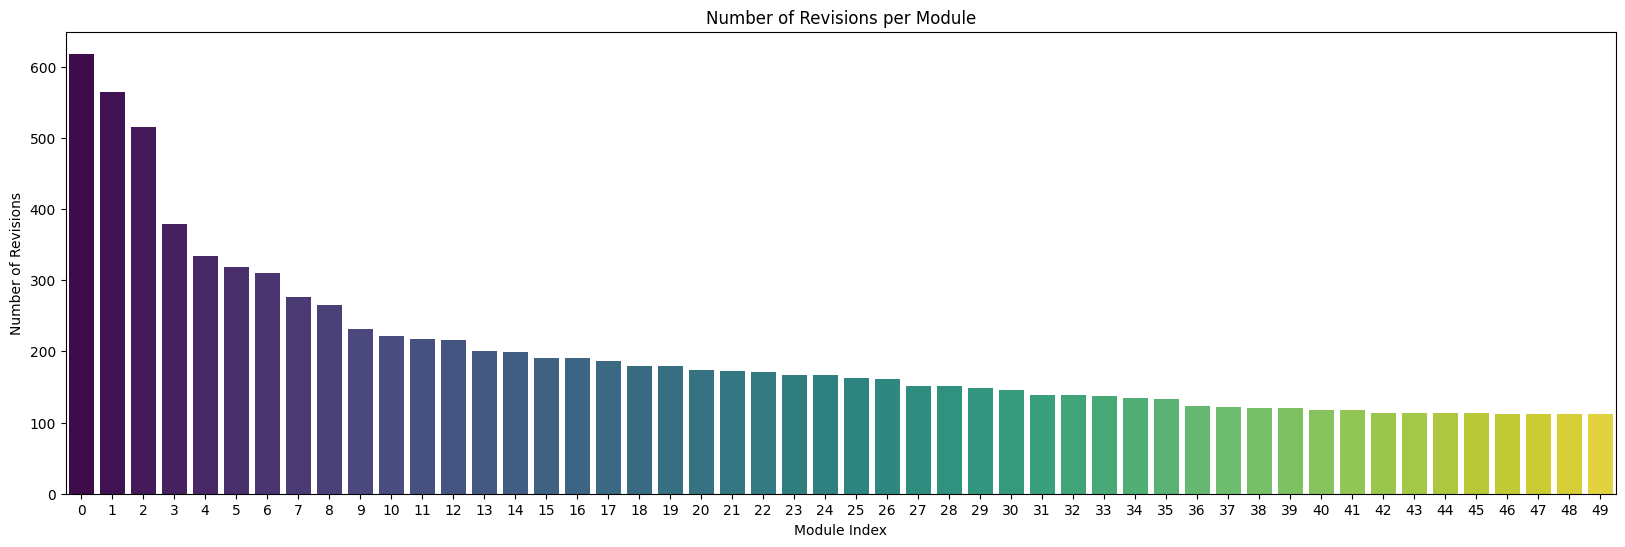

In [8]:
# plot revision over each module
plt.figure(figsize=(20, 6))
sns.barplot(data=df, x=df.index, y='revisions',hue= df.index, palette='viridis', legend=False)
plt.title('Number of Revisions per Module')
plt.xlabel('Module Index')
plt.ylabel('Number of Revisions')
plt.show()

In [9]:
# return the top 20 modules with the highest technical debt
top_td_modules = df.iloc[:20] # already sorted by revisions then LOC
top_td_modules

,module,revisions,code
0,vllm/engine/arg_utils.py,618,1764
1,vllm/v1/worker/gpu_model_runner.py,564,4332
2,.buildkite/test-pipeline.yaml,515,1289
3,vllm/envs.py,379,1109
4,vllm/engine/llm_engine.py,334,2
5,vllm/entrypoints/openai/api_server.py,318,728
6,tests/models/registry.py,310,1018
7,vllm/model_executor/models/registry.py,277,1026
8,vllm/entrypoints/llm.py,265,1082
9,vllm/_custom_ops.py,232,2417


In [10]:
# Remove readme, text file and build files from the analysis
top_td_modules = df[~df['module'].str.contains('README|readme|.txt|.md|build|.yml|.yaml|.json|.xml', case=False)]
top_td_modules = top_td_modules.reset_index(drop=True)
top_td_modules

,module,revisions,code
0,vllm/engine/arg_utils.py,618,1764
1,vllm/v1/worker/gpu_model_runner.py,564,4332
2,vllm/envs.py,379,1109
3,vllm/engine/llm_engine.py,334,2
4,vllm/entrypoints/openai/api_server.py,318,728
5,tests/models/registry.py,310,1018
6,vllm/model_executor/models/registry.py,277,1026
7,vllm/entrypoints/llm.py,265,1082
8,vllm/_custom_ops.py,232,2417
9,setup.py,221,745


In [11]:
# get top 10 of the refined list
top_td_modules = top_td_modules.iloc[:10]
top_td_modules

,module,revisions,code
0,vllm/engine/arg_utils.py,618,1764
1,vllm/v1/worker/gpu_model_runner.py,564,4332
2,vllm/envs.py,379,1109
3,vllm/engine/llm_engine.py,334,2
4,vllm/entrypoints/openai/api_server.py,318,728
5,tests/models/registry.py,310,1018
6,vllm/model_executor/models/registry.py,277,1026
7,vllm/entrypoints/llm.py,265,1082
8,vllm/_custom_ops.py,232,2417
9,setup.py,221,745


### Complexity analysis using indentation as metric

- n – total number of lines
- Total – total complexity (indention number)
- Mean and SD – mean and standard deviation (2.42 means each line on average has two indentions)
- Max – largest complexity (indention number)

In [12]:
!python scripts_4/complexity_analysis.py vllm/vllm/v1/worker/gpu_model_runner.py

n,total,mean,sd,max
5393,16121.5,2.99,1.29,8.0


In [13]:
!cloc vllm/vllm/v1/worker/gpu_model_runner.py

       1 text file.
       1 unique file.                              
       0 files ignored.

github.com/AlDanial/cloc v 1.98  T=0.04 s (22.3 files/s, 135106.9 lines/s)
-------------------------------------------------------------------------------
Language                     files          blank        comment           code
-------------------------------------------------------------------------------
Python                           1            673           1061           4332
-------------------------------------------------------------------------------


## Complexity from code shape

So we can use this calculate the complexity for a particular revision. But the trends of the complexity is what that is of more interest to us. In a Git Bash Shell: We need to get the hash commits for the pull request for the period of time to dive deeper into this file.

Span from [214efc2c3] Maximilien de Bayser 2024-11-24 Support Cross encoder models (#10400) to [c25dbee40] Cyrus Leung 2026-01-27 [Model] Bump transformers version for test registry (#33100).

In [14]:
# run git complexity trend analysis script
# make sure you are in vllm repo so git command works on the intended repo
!cd vllm && python /workspaces/UC26_Software_Architecture/assignment1/scripts_4/git_complexity_trend.py --start "214efc2" --end "c25dbee" --file "vllm/v1/worker/gpu_model_runner.py" > /workspaces/UC26_Software_Architecture/assignment1/logs/git_complexity_trend.csv


### load git_complexity_trend.csv

In [15]:
gct_df = pd.read_csv('logs/git_complexity_trend.csv')
gct_df.head()

,rev,n,total,mean,sd
0,9a88f8979,762,2152.75,2.83,2.03
1,2f0a0a17a,763,2155.75,2.83,2.03
2,dc5ce861b,765,2159.75,2.82,2.02
3,2a56e1264,772,2179.00,2.82,2.02
4,25b79d9fd,547,1550.25,2.83,1.84


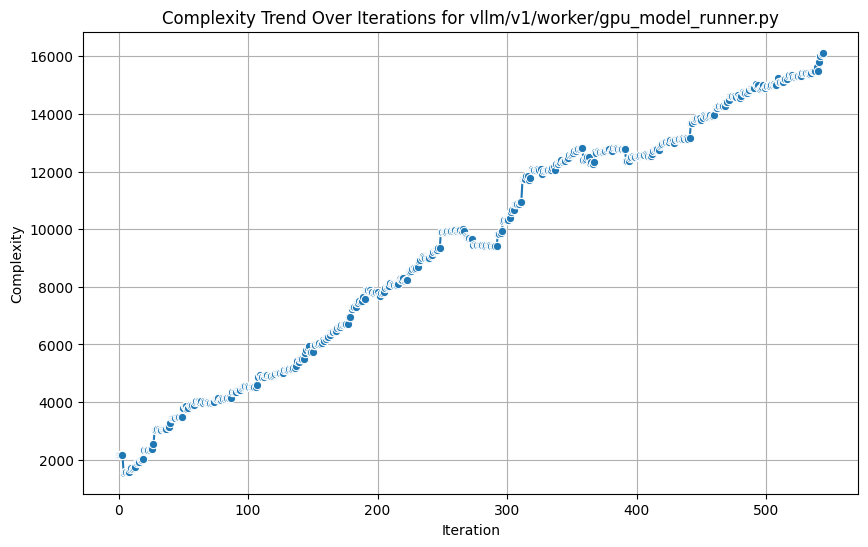

In [16]:
# plot the trend of complexity iteration
plt.figure(figsize=(10, 6))
sns.lineplot(data=gct_df, x=gct_df.index, y='total', marker='o')
plt.title('Complexity Trend Over Iterations for vllm/v1/worker/gpu_model_runner.py')
plt.xlabel('Iteration')
plt.ylabel('Complexity')
plt.grid(True)
plt.show()

With this code shape, we can see that the module `arg_utils.py` has gone through 2 code refractors